## Customer problems: build state preparation circuits

1. Quantum Machine Learning customers need to load their classical data into quantum state vectors.
<img src="classical_data.png" width=360  />

2. Quantum chemists need to prepare the initial states for their quantum algorithms.
<img src="chemistry_state.png" width=240  />

**Note**: On SV1 or LocalSimulator, it's preferrable to have customers directly input a state vector, not let them build a circuit.


## State preparation is complicated

Currently, the best general state preparation method is called the **Schmidt decomposition**, it works like the following:
<img src="schmidt.jpg" width=380  />

In this demo, we focus on the box on the right: KAK decomposition

#  3 mins intro to KAK decomposition

**KAK decomposition** comes from the KAK theorem in a branch of maths called Lie group theory, it tells us the structure of 2-qubit unitaries.

It is fundamental in many aspects in Quantum Computing:
1. Compilation and unitary syntheis
2. Pulse-level control
3. State preparation

## Why the name KAK?

We can understand KAK as:
- K: Single qubit evolution
- A: 2 qubit interaction

Roughly, KAK means to syntheize
any 2 qubit unitary, we need to do several 1 qubit gates then several 2 qubit gates and then several 1 qubit gates again.

We can think of a "cylinder" KAK decomposition:
<img src="cylinder.jpg" width=280  />

## KAK theorem: the content

Any 2-qubit unitaries can be decomposed in the following form:


$$ U(4) = (U_1 \otimes U_2) e^{i(A\hat{\sigma_x}\hat{\sigma_x} + B\hat{\sigma_y}\hat{\sigma_y} + C\hat{\sigma_z}\hat{\sigma_z})}(U_3 \otimes U_4) $$

Where $U_1, U_2, U_3, U_4$ are 1-qubit gates and in the middle is a pulse term with the Heinsenberg interaction term.


## KAK vectors

We can call the vector $(A, B, C)$ the KAK vector. Two 2-qubit gates with the same KAK vector are equivalent.

It turns out the KAK vector of all 2-qubit gates live in a 3-d tetradehdron, $W = \{\frac{\pi}{4} \ge A \ge B \ge |C|\}$
            
            
 <img src="weyl_chamber.png" width=370  />           
            
 This tetrahedron is call the **Weyl chamber**.
 
 The KAK vector of some common gates:
 
 - I $ (0, 0, 0)$
 - SWAP $(\frac{\pi}{4}, \frac{\pi}{4}, \frac{\pi}{4})$
 - CNOT / CZ $(\frac{\pi}{4}, 0, 0)$
 - iSWAP $(\frac{\pi}{4}, \frac{\pi}{4}, 0)$
 


## Important corollaries based on KAK

### 1. In the worst case, we just need 3 CNOTs to synthesize any 2 qubit unitaries

<img src="cnots.png" width=500  />

### 2. The set of 2q gates can be synthesized by 2 CNOTs have measure 0 on SU(4).

### 3. The set of 2q gates can be synthesized by 2 sqrt-iSWAP gate takes 79% on SU(4).

### 4. There is a  "B gate" that we just need 2 of them to synthesize any  two qubit unitaries. It has a KAK vector of $(\frac{\pi}{4}, \frac{\pi}{8}, 0)$. 

### 5. There are some gates that we need more than 3 to  construct arbitrary two-qubit unitaries.


## Implementation


1. Split $U$ into the real and imaginary part and simultaneously diagonalize them using a decomposition from Eckhart-Young.

    -- **Constructive Quantum Shannon Decomposition from Cartan Involutions**, *Byron Drury, Peter J. Love* quant-ph > arXiv:0806.4015
    
    -- **A princial axis transformation for non-hermitian matrices**, *C. Eckart and G. Young*, Bull. Amer. Math. Soc. 45, 118-121 (1939).

2. Map $su(2)\times su(2)$ to $SO(4)$ using the magic basis $m$ based on the algorithms in the following papers.
$$ m = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 0 & 0 & i\\
0 & i & 1 & 0\\
0 & i &-1 & 0\\
1 & 0 & 0 &-i
\end{pmatrix}$$

    -- **Nonlocal properties of two-qubit gates and mixed states and optimization of quantum computations**, *Yuriy Makhlin*, arXiv:quant-ph/0002045v2.
    
    -- **An introduction to Cartan's KAK decomposition for QC programmers**, *Robert R. Tucci*,  arXiv:quant-ph/0507171
arXiv:0806.4015


3. Find the KAK vector using the diagonal matrix in the last step and the $\Gamma$ matrix based on the algorithms in the following papers.:
$$ \Gamma = \begin{pmatrix}
1 & 1 & -1 & 1\\
1 & 1 &  1 & 1\\
1 &-1 & -1 &-1\\
1 &-1 &  1 & 1
\end{pmatrix}$$

    -- **Constructive Quantum Shannon Decomposition from Cartan Involutions**, *Byron Drury, Peter J. Love* quant-ph 

4. Flip the KAK into the Weyl chamber using the operations in the Weyl group.

    -- **Lower bounds on the complexity of simulating quantum gates**, *Andrew M. Childs, Henry L. Haselgrove and Michael A. Nielsen*,  arXiv:quant-ph/0307190
    
    -- **An introduction to Cartan's KAK decomposition for QC programmers**, *Robert R. Tucci*,  arXiv:quant-ph/0507171
arXiv:0806.4015


In [1]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = [8, 4]

# Numerical
import numpy as np
from scipy.linalg import expm

# Braket
from braket.circuits.synthesis.two_qubit_decomposition import (TwoQubitDecomposition,
                                                         two_qubit_decompose)
from braket.circuits.gates import X, Y, Z

# Pauli matrices
x = X().to_matrix()
y = Y().to_matrix()
z = Z().to_matrix()

# Controlled-Z gate
cz =  np.array([[1, 0, 0, 0], 
                [0, 1, 0, 0], 
                [0, 0, 1, 0], 
                [0, 0, 0,-1]], dtype=np.complex128)

In [2]:
# Construct KAKDecomposition object.

cz_decomp = TwoQubitDecomposition(cz)
type(cz_decomp)

braket.circuits.synthesis.two_qubit_decomposition.TwoQubitDecomposition

In [3]:
# Alteranatively, using a function call.

cz_decomp = two_qubit_decompose(cz)
type(cz_decomp)

braket.circuits.synthesis.two_qubit_decomposition.TwoQubitDecomposition

In [4]:
print(cz_decomp)

TwoQubitDecomposition(
  U = (u1 ⊗ u2) · exp(i(v0·XX + v1·YY+v2·ZZ))·(u3 ⊗ u4)
  global phase: (0.7071067811865481-0.7071067811865482j),
  canonical vector v: [0.78539816 0.         0.        ],
  u1: [[ 0.5-0.5j  0.5-0.5j]
      [ 0.5+0.5j -0.5-0.5j]],
  u2: [[-0.5+0.5j  0.5-0.5j]
      [ 0.5+0.5j  0.5+0.5j]],
  u3: [[ 0.70710678+0.j -0.70710678+0.j]
      [ 0.70710678+0.j  0.70710678+0.j]],
  u4: [[ 0.70710678+0.j  0.70710678+0.j]
      [-0.70710678+0.j  0.70710678+0.j]]
)


In [5]:
cz_decomp.pretty_print()

TwoQubitDecomposition(
  U = (u1 ⊗ u2) · exp(i(v0·XX + v1·YY+v2·ZZ))·(u3 ⊗ u4)
  global phase: 0.707-0.707j,
  canonical vector: [0.785 0.    0.   ],
  u1: [[ 0.5-0.5j  0.5-0.5j]
      [ 0.5+0.5j -0.5-0.5j]],
  u2: [[-0.5+0.5j  0.5-0.5j]
      [ 0.5+0.5j  0.5+0.5j]],
  u3: [[ 0.707+0.j -0.707+0.j]
      [ 0.707+0.j  0.707+0.j]],
  u4: [[ 0.707+0.j  0.707+0.j]
      [-0.707+0.j  0.707+0.j]]
)


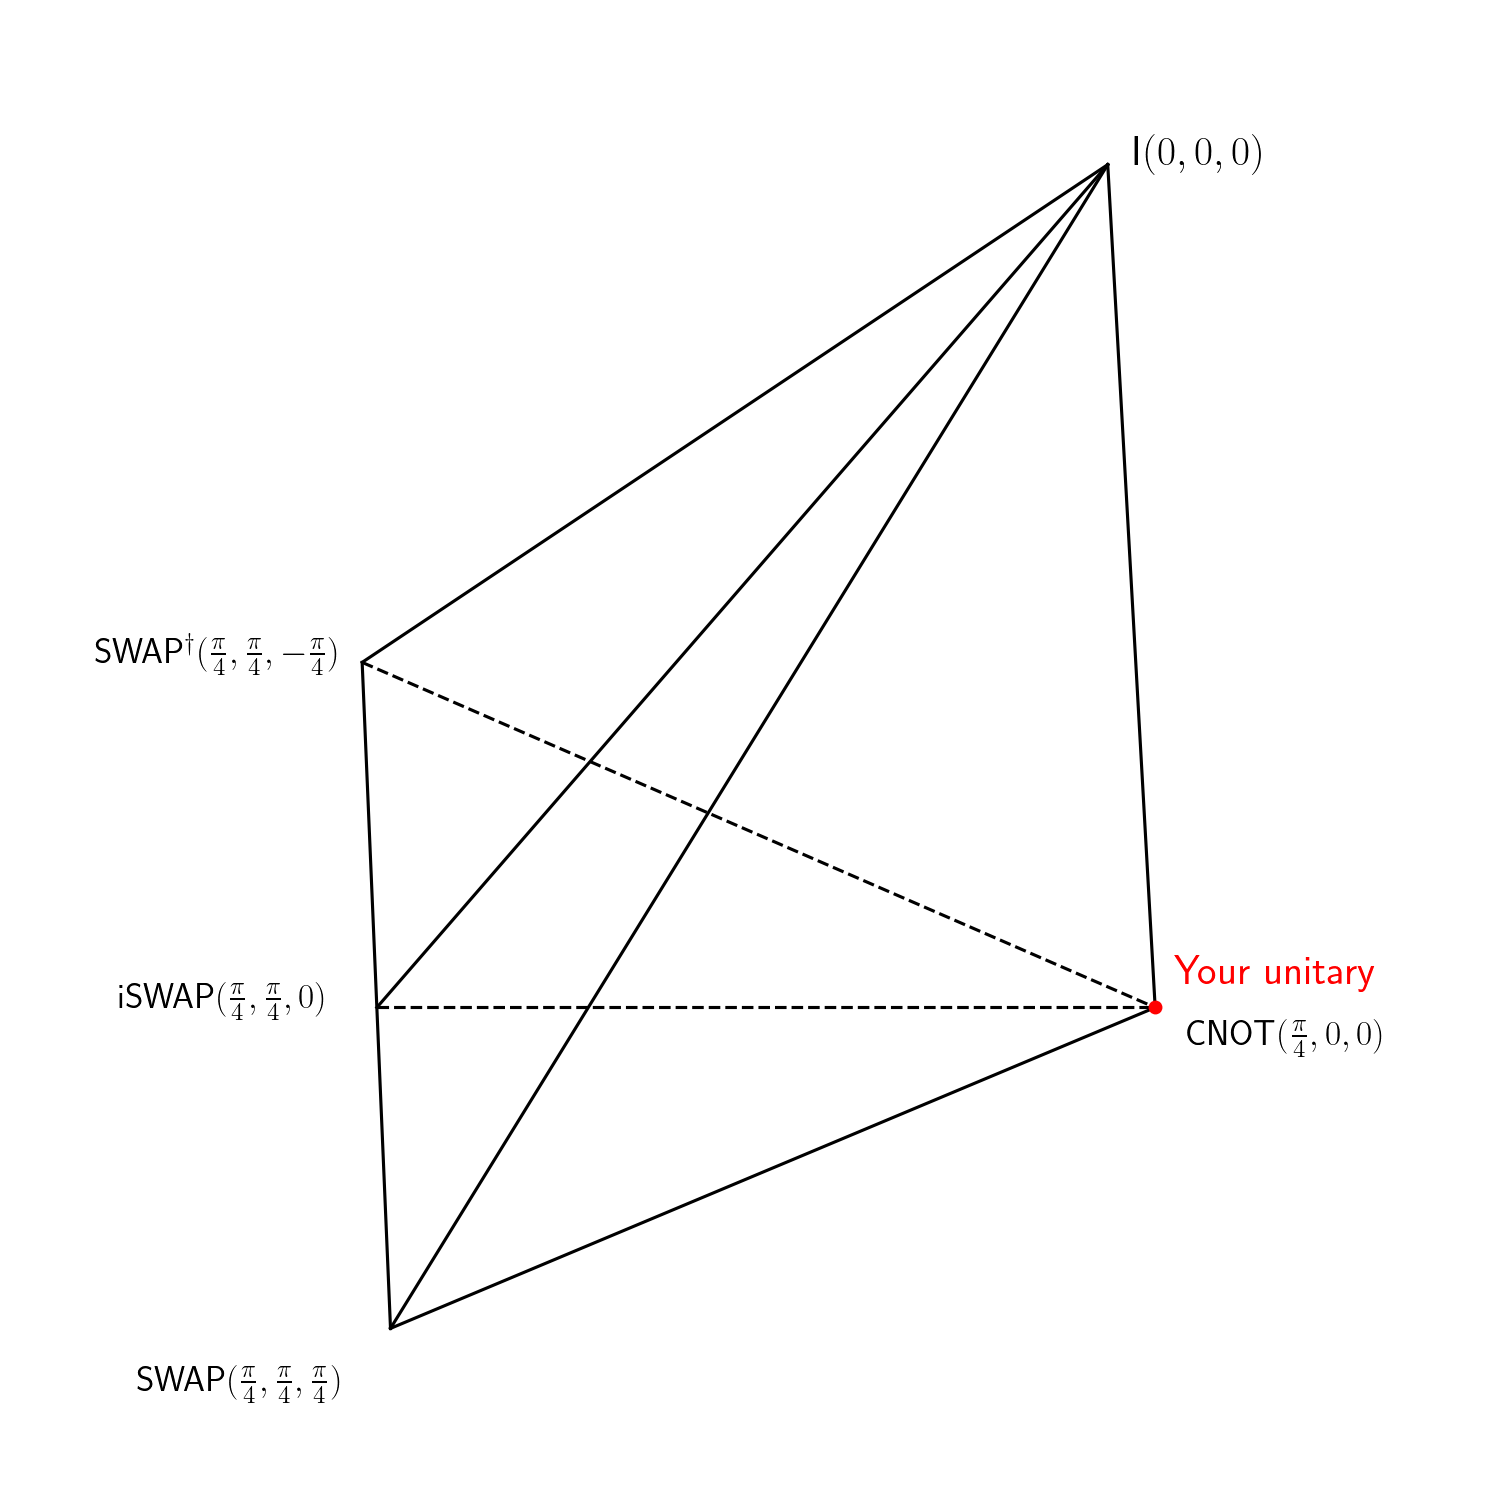

In [6]:
cz_decomp.plot_canonical_vector()

In [7]:
cz_decomp.unitary()

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [8]:
cz_decomp.num_cnots()

1

In [14]:
# SWAP gate
swap =  np.array([[1, 0, 0, 0], 
                  [0, 0, 1, 0], 
                  [0, 1, 0, 0], 
                  [0, 0, 0, 1]], dtype=np.complex128)
swap_decomp = TwoQubitDecomposition(swap)
swap_decomp.num_cnots()

3

In [15]:
from braket.circuits.gates import CNot

cx = CNot().to_matrix()

cx_decomp = TwoQubitDecomposition(cx)
cx_decomp.num_cnots()
print(cx_decomp)

TwoQubitDecomposition(
  U = (u1 ⊗ u2) · exp(i(v0·XX + v1·YY+v2·ZZ))·(u3 ⊗ u4)
  global phase: (-0.7071067811865476+0.7071067811865481j),
  canonical vector v: [0.78539816 0.         0.        ],
  u1: [[-0.5-0.5j  0.5+0.5j]
      [ 0.5-0.5j  0.5-0.5j]],
  u2: [[-5.55111512e-17+7.07106781e-01j  7.07106781e-01+5.55111512e-17j]
      [ 7.07106781e-01+5.55111512e-17j -5.55111512e-17+7.07106781e-01j]],
  u3: [[-4.32978028e-17+0.70710678j  4.32978028e-17-0.70710678j]
      [ 4.32978028e-17-0.70710678j  4.32978028e-17-0.70710678j]],
  u4: [[0.000000e+00+0.j 6.123234e-17-1.j]
      [6.123234e-17-1.j 0.000000e+00+0.j]]
)


In [21]:
import random

def u(a, b, c): 
    return np.array(
        [   
            [np.cos(0.5 * a), -np.exp(1j * c) * np.sin(0.5 * a)],
            [np.sin(0.5 * a) * np.exp(1j * b), np.cos(0.5 * a) * np.exp(1j * (b + c))],
        ],  
        dtype=np.complex128,
    )   

def random_kron_u():
    return np.kron(u(2*np.pi*random.random(),
                     2*np.pi*random.random(),
                     2*np.pi*random.random()),
                   u(2*np.pi*random.random(),
                     2*np.pi*random.random(),
                     2*np.pi*random.random()))

random_decomp = TwoQubitDecomposition(random_kron_u(), atol=1e-6, rtol=1e-4)
print(random_decomp.build_circuit())

three_cnot = random_kron_u() @ cx @ random_kron_u() @ cx @ random_kron_u() @ cx @ random_kron_u()
three_cnot_decomp = TwoQubitDecomposition(three_cnot, atol=1e-6, rtol=1e-4)
print(three_cnot_decomp.build_circuit())


T  : |   0    |   1    |   2    |
                                 
q0 : -Rz(1.44)-Ry(2.09)-Rz(6.03)-
                                 
q1 : -Rz(1.66)-Ry(1.33)-Rz(5.51)-

T  : |   0    |   1    |   2    |
T  : |   0    |1|   2    |   3    |   4    |5|    6    |   7    |   8    |9|   10    |   11    |   12   |
                                                                                                         
q0 : -Rz(-1.6)-X-Rz(2.26)-Ry(1.64)-Rz(4.71)-X-Rz(-1.14)-------------------X-Rz(0.447)-Ry(1.95)--Rz(3.48)-
               |                            |                             |                              
q1 : ----------C-Rz(2.35)-Ry(2.32)-Rz(5.3)--C-Rz(1.57)--Ry(1.85)-Rz(4.71)-C-Rz(3.33)--Ry(0.477)-Rz(3.6)--

T  : |   0    |1|   2    |   3    |   4    |5|    6    |   7    |   8    |9|   10    |   11    |   12   |


# General subroutines implemented (that can be reused in a lot of quantum information applications)

### 1. simultaneously_diagonalize_commuting_hermitian_matrices

### 2. simultaneously_diagonlizae_matrices_with_hermitian_products

### 3. orthogonal_diagonal_orthogonal_decomposition

### 4. makhlin_invariants

### 5. shende_markov_bullock_invariants (gamma invariants)

### 6. characteristic_polynomial of a square matrix

### 7. decompose_one_qubit_product_gates

They are all properly placed in different .py files:

#### braket.circuits.synthesis.invariants: 
    - makhlin_invariants 
    - gamma_invariants

#### braket.circuits.synthesis.util: 
    - characteristic_polynomial
    - simultaneously_diagonalize_commuting_hermitian_matrices
    - simultaneously_diagonlizae_matrices_with_hermitian_products

#### braket.circuits.synthesis.kak_decomposition: 
    - orthogonal_diagonal_orthogonal_decomposition
    - KAKDecomposition
    - decompose_one_qubit_product_gates

# Numerical stability

### 1. Use better algorithms, for example, check early if there will be divide by 0 using the easier-to-compute makhlin_invariant

### 2. cover more cases with unit tests (70 unit tests written and 10K+ randomly generated tests)

### 3. Allow user to input absolute tolerance of errors and relative tolerance of errors.

In [11]:
random_u = np.array([[-0.49007092+0.00702938j, 0.39489867+0.41581432j,-0.59705207-0.23140995j,-0.01772778+0.14352199j],
                     [ 0.31736401+0.03787557j,-0.0756966 -0.39778764j,-0.32945446-0.50656775j,0.51663842+0.31908332j],
                     [-0.40662081+0.61444012j,-0.52129145-0.19082607j,-0.0879649 -0.24656548j,-0.18218762-0.21734488j],
                     [-0.30884813+0.13914848j,-0.28087774+0.34660762j, 0.28851213+0.27028786j,0.59672663+0.41694597j]])

In [12]:
random_u_decomp = TwoQubitDecomposition(random_u)

In [13]:
random_u_decomp = TwoQubitDecomposition(random_u,
                                        atol=1E-5,
                                        rtol=1E-3)

random_u_decomp.pretty_print()

TwoQubitDecomposition(
  U = (u1 ⊗ u2) · exp(i(v0·XX + v1·YY+v2·ZZ))·(u3 ⊗ u4)
  global phase: 0.928+0.372j,
  canonical vector: [0.84  0.464 0.012],
  u1: [[ 0.299+0.905j  0.254+0.163j]
      [ 0.254-0.163j -0.299+0.905j]],
  u2: [[ 0.193+0.165j  0.428+0.868j]
      [-0.428+0.868j  0.193-0.165j]],
  u3: [[ 0.432-0.07j  -0.694-0.572j]
      [-0.694+0.572j -0.432-0.07j ]],
  u4: [[-0.698+0.307j  0.647+0.001j]
      [-0.647+0.001j -0.698-0.307j]]
)


# State preparation roadmap
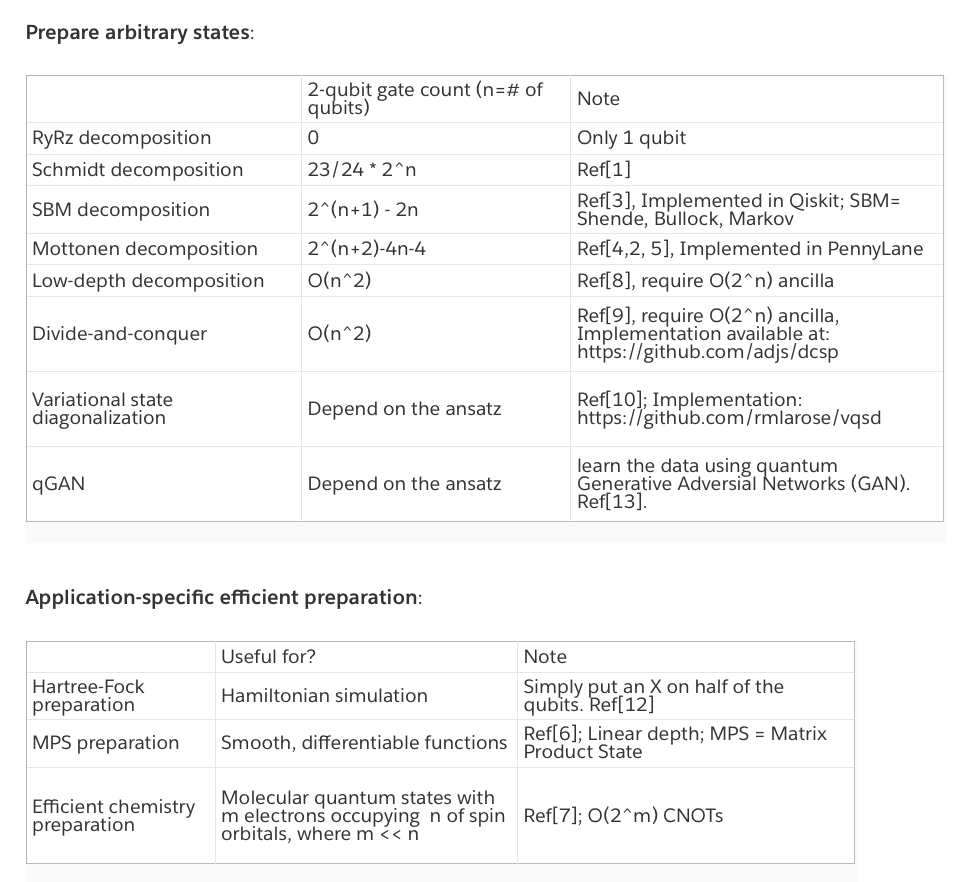